# AE4465 (MM&A) - Lecture4 (Simple Exponential Smoothing)

In statistics, a Simple Exponential Smoothing (SES) is a forecasting model that extends the basic moving average by adding weights to previous estimates.

$$f_{t+1} =f_t + \alpha (y_t - f_t)$$

where
$f_{t+1}$ is the forecast of the next value
$\alpha$ is the weight given to current values opposed to previous forecast (reactivity)
$y$ is the signal value at some moment in time

In this tutorial you will learn how to use SES to forecast costs of maintenance.

In [7]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

In [41]:
# Import the data in csv file
df = pd.read_csv('data/les04_SES.csv')
# Read the columns
print('The columns of the csv file are: ')
# Iterate over two arrays (column names and index) and print accordingly
for colname, i in zip(df.columns, range(len(df.columns))):
    print(i, '- Column: ', colname)
df['Date'] = pd.to_datetime(df.Date)
df = df.set_index('Date')
df.head()

The columns of the csv file are: 
0 - Column:  Date
1 - Column:  Cost


,Cost
Date,
1962-01-01,265.05
1962-02-01,252.45
1962-03-01,288.00
1962-04-01,295.20
1962-05-01,327.15


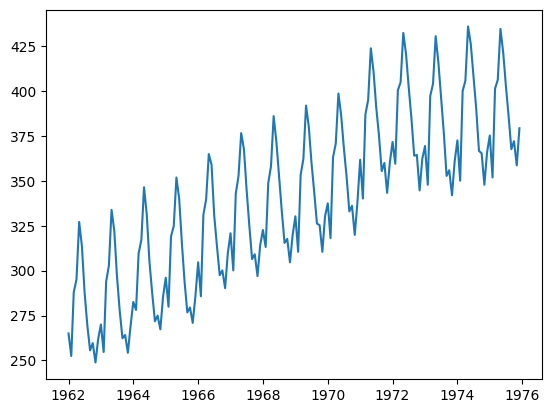

In [42]:
# Let's start by plotting our time series.

plt.plot(df.Cost)

### SES Model

To create a simple exponential smoothing model, we can use the SimpleExpSmoothing from the statsmodels package. We first create an instance of the class with our data, then call the fit method with the value of alpha we want to use.

In [44]:
ses = SimpleExpSmoothing(df)

alpha = 0.2
model = ses.fit(smoothing_level = alpha, optimized = False)

D:\Projects\ModelBasedPrognostics\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


### Forecasting with SES
Now that we have the model, we can forecast using the forecast method. We will predict the next 3 data points.

Index(['Cost'], dtype='object')


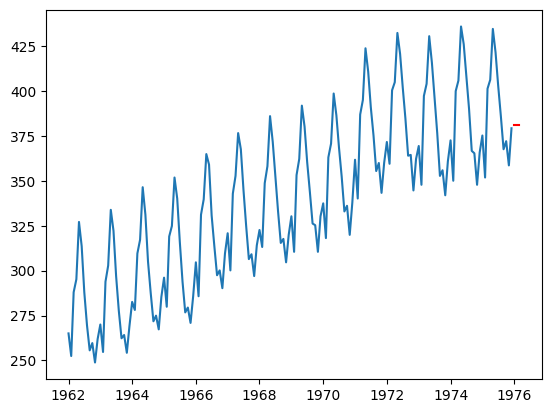

In [47]:
forecast = model.forecast(3)
print(df.columns)
plt.plot(df)
plt.plot(forecast, c='red')

### Smoothing
You can also use SES to smooth your data (with more or less reactivity)


Text(0, 0.5, 'Cost')

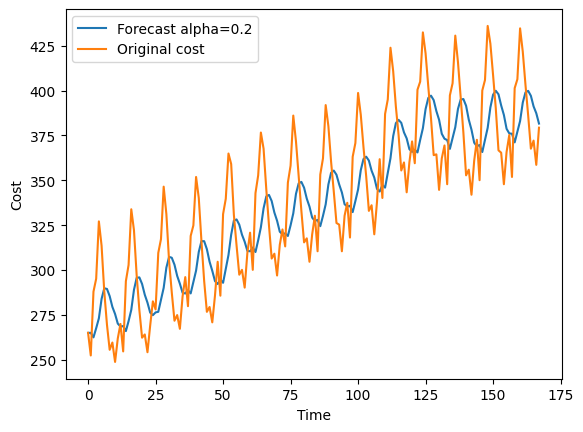

In [63]:
y = df.Cost.values

## Start with the first point
forecast = [y[0]]
alpha = 0.2

for i in range(1, len(y)):
    predict = alpha * y[i - 1] + (1 - alpha) * forecast[i - 1]
    forecast.append(predict)

plt.plot(forecast, label='Forecast alpha=' + str(alpha))
plt.plot(y, label='Original cost')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Cost')